# Chicago Crime Data

Nena Esaw

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

import holidays
import datetime as dt
from holidays import country_holidays

In [2]:
#Check what files exist in the folder
FOLDER = 'Data/Chicago/'
file_list = sorted(os.listdir(FOLDER))
file_list



['Chicago-Crime_2001.csv',
 'Chicago-Crime_2002.csv',
 'Chicago-Crime_2003.csv',
 'Chicago-Crime_2004.csv',
 'Chicago-Crime_2005.csv',
 'Chicago-Crime_2006.csv',
 'Chicago-Crime_2007.csv',
 'Chicago-Crime_2008.csv',
 'Chicago-Crime_2009.csv',
 'Chicago-Crime_2010.csv',
 'Chicago-Crime_2011.csv',
 'Chicago-Crime_2012.csv',
 'Chicago-Crime_2013.csv',
 'Chicago-Crime_2014.csv',
 'Chicago-Crime_2015.csv',
 'Chicago-Crime_2016.csv',
 'Chicago-Crime_2017.csv',
 'Chicago-Crime_2018.csv',
 'Chicago-Crime_2019.csv',
 'Chicago-Crime_2020.csv',
 'Chicago-Crime_2021.csv',
 'Chicago-Crime_2022.csv',
 'Chicago-Crime_2023.csv',
 'README.txt']

In [3]:
#Use glob to find crime csv files
q = FOLDER+"Chicago-*csv"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/Chicago/Chicago-*csv


['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [4]:
#Use glob to find crime csv files
q = FOLDER+"Chicago-*csv"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data/Chicago/Chicago-*csv


['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [5]:
#Use list comprehension to load all files into 1 data frame
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
0,1314713,01/01/2001 01:00:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672219588\r
1,1310782,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,41.685177,-87.643029232\r
2,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849345\r
3,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418276\r
4,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623098\r
...,...,...,...,...,...,...,...,...,...,...,...,...
185764,13217707,09/20/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,RESIDENCE,False,True,2031,20.0,40.0,41.970712,-87.700416882\r
185765,13223000,09/20/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,HOTEL / MOTEL,False,False,1614,16.0,41.0,41.986989,-87.840745861\r
185766,13216445,09/20/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,623,6.0,17.0,41.748199,-87.629235372\r
185767,13217710,09/20/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,HOTEL / MOTEL,False,False,1614,16.0,41.0,41.986989,-87.840745861\r


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7899126 entries, 0 to 185768
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
            object 
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 678.0+ MB


In [7]:
#check for missing values 
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11813
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 89883
Longitude\r                  0
dtype: int64

In [8]:
#drop missing values from district 
df = df.dropna(subset = 'District')
#verify values were dropped 
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     11813
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    614849
Latitude                 89883
Longitude\r                  0
dtype: int64

### Convert to Datetime Data Type 

In [9]:
df['Date'].sample(n=10).sort_index()

38870     02/06/2007 01:41:44 PM
44243     02/10/2005 02:24:00 PM
44408     03/11/2015 06:10:00 PM
46623     02/25/2012 09:00:00 PM
140875    07/14/2018 10:55:00 PM
164389    05/19/2006 01:00:00 AM
310457    08/21/2001 11:00:00 AM
311846    10/27/2010 08:30:00 PM
365769    10/16/2005 12:15:00 AM
429406    12/15/2006 02:15:00 AM
Name: Date, dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")
#verify changes made 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7899079 entries, 0 to 185768
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
            object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 678.0+ MB


C:\Users\nena_\AppData\Local\Temp\ipykernel_1568\1244727804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")


### Set Date as the Index 


In [11]:
#Set date column as index
df_ts = df.set_index('Date')
df_ts.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
Date,,,,,,,,,,,
2001-01-01 13:00:00,1314713,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,True,True,1322,12.0,NaN,41.899521,-87.672219588\r
2001-01-01 13:00:00,1310782,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,2234,22.0,NaN,41.685177,-87.643029232\r
2001-01-01 01:00:00,5462733,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,41.789084,-87.620849345\r
2001-01-01 01:00:00,1310610,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418276\r
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623098\r


In [12]:
### Drop unncessary columns 
#Drop columns not pertaining to questions
df_ts = df_ts.drop(columns = ['ID', 'Location Description', 'Ward', 
                              'Latitude', 'Longitude\r'])
df_ts.head()

,Primary Type,Description,Arrest,Domestic,Beat,District
Date,,,,,,
2001-01-01 13:00:00,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,True,True,1322,12.0
2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,2234,22.0
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,True,233,2.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0
2001-01-01 01:00:00,THEFT,$500 AND UNDER,False,False,1813,18.0


In [13]:
df_ts.head()

,Primary Type,Description,Arrest,Domestic,Beat,District
Date,,,,,,
2001-01-01 13:00:00,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,True,True,1322,12.0
2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,2234,22.0
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,False,True,233,2.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,1913,19.0
2001-01-01 01:00:00,THEFT,$500 AND UNDER,False,False,1813,18.0


## Feature Engineering

### Comparing Police Districts:


In [14]:
#Group district and primary type
districts = df_ts.groupby('District')['Primary Type'].value_counts().sort_index()
df_districts = districts.to_frame('# of Crimes').reset_index()
df_districts

,District,Primary Type,# of Crimes
0,1.0,ARSON,126
1,1.0,ASSAULT,15177
2,1.0,BATTERY,33999
3,1.0,BURGLARY,5356
4,1.0,CONCEALED CARRY LICENSE VIOLATION,22
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [15]:
#Aggregate crimes by district
plot_df = df_districts.groupby('District').agg({'# of Crimes':'sum'}).reset_index()
plot_df

,District,# of Crimes
0,1.0,320991
1,2.0,374576
2,3.0,400530
3,4.0,448396
4,5.0,349580
5,6.0,461962
6,7.0,455176
7,8.0,530457
8,9.0,385499
9,10.0,340328


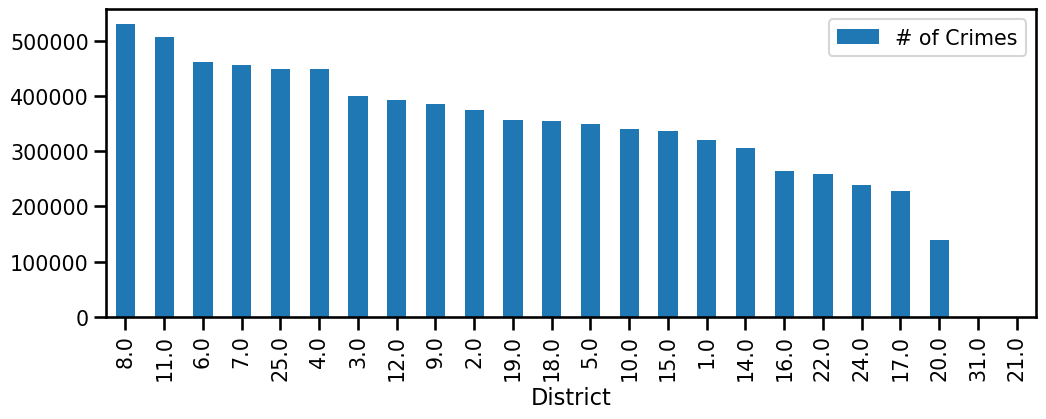

In [16]:
#Plot data
ax = plot_df.sort_values(by = '# of Crimes', 
                         ascending = False).plot(kind = 'bar', 
                                                 x = 'District', y = '# of Crimes');

Which district has the most crimes? Which has the least?

* The with the most crime is district 8 and the district with the least is 20. 


###  Crimes Across the Years:



In [17]:
## Engineering Features using components of the date/time
df_ts['Year']  = df_ts.index.year


In [18]:
df_ts['Year'].value_counts().sort_index(ascending = False).head(15)



2023    185769
2022    238947
2021    208870
2020    212220
2019    261352
2018    268912
2017    269108
2016    269834
2015    264793
2014    275792
2013    307540
2012    336322
2011    351993
2010    370517
2009    392827
Name: Year, dtype: int64

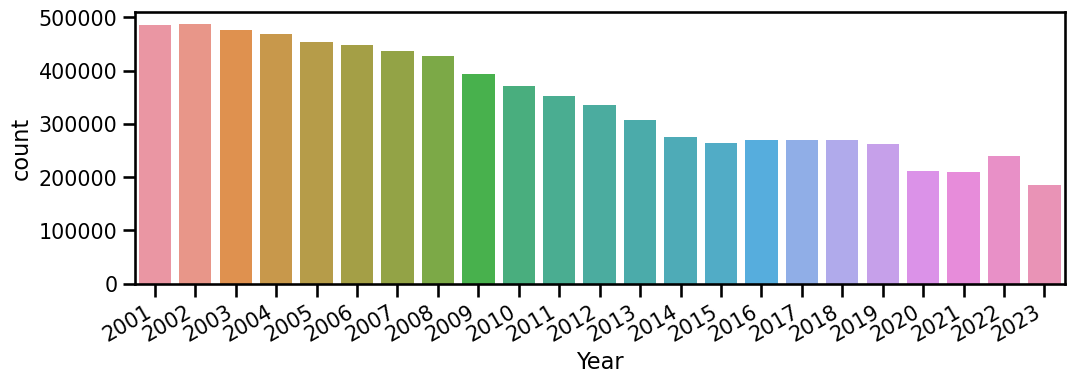

In [19]:
## visualizing years 
ax = sns.countplot(data=df_ts, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate();



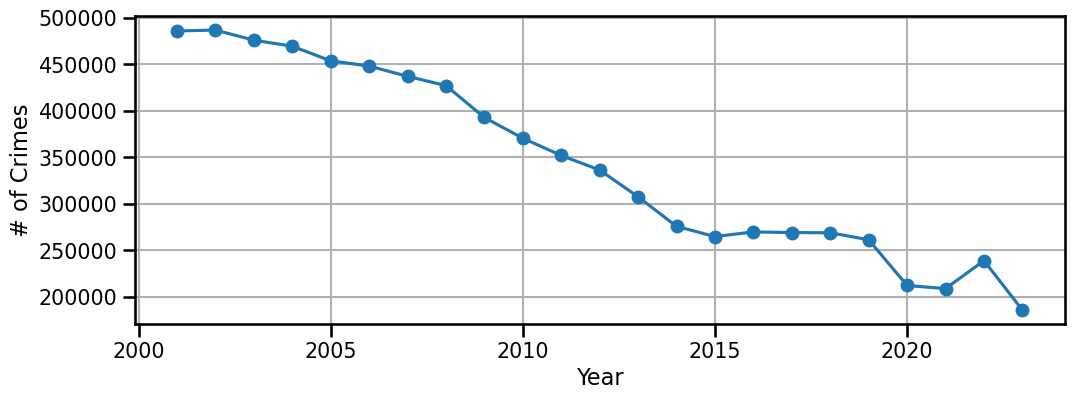

In [20]:
## save year counts
year_counts = df_ts['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');



In [21]:
#Group crime type with year
crime_year = df_ts.groupby('Primary Type')['Year'].value_counts().sort_index()
crime_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8775
                   2023    6446
Name: Year, Length: 720, dtype: int64

In [22]:
#Convert to df
plot_df = crime_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8775


C:\Users\nena_\anaconda3\envs\dojo-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


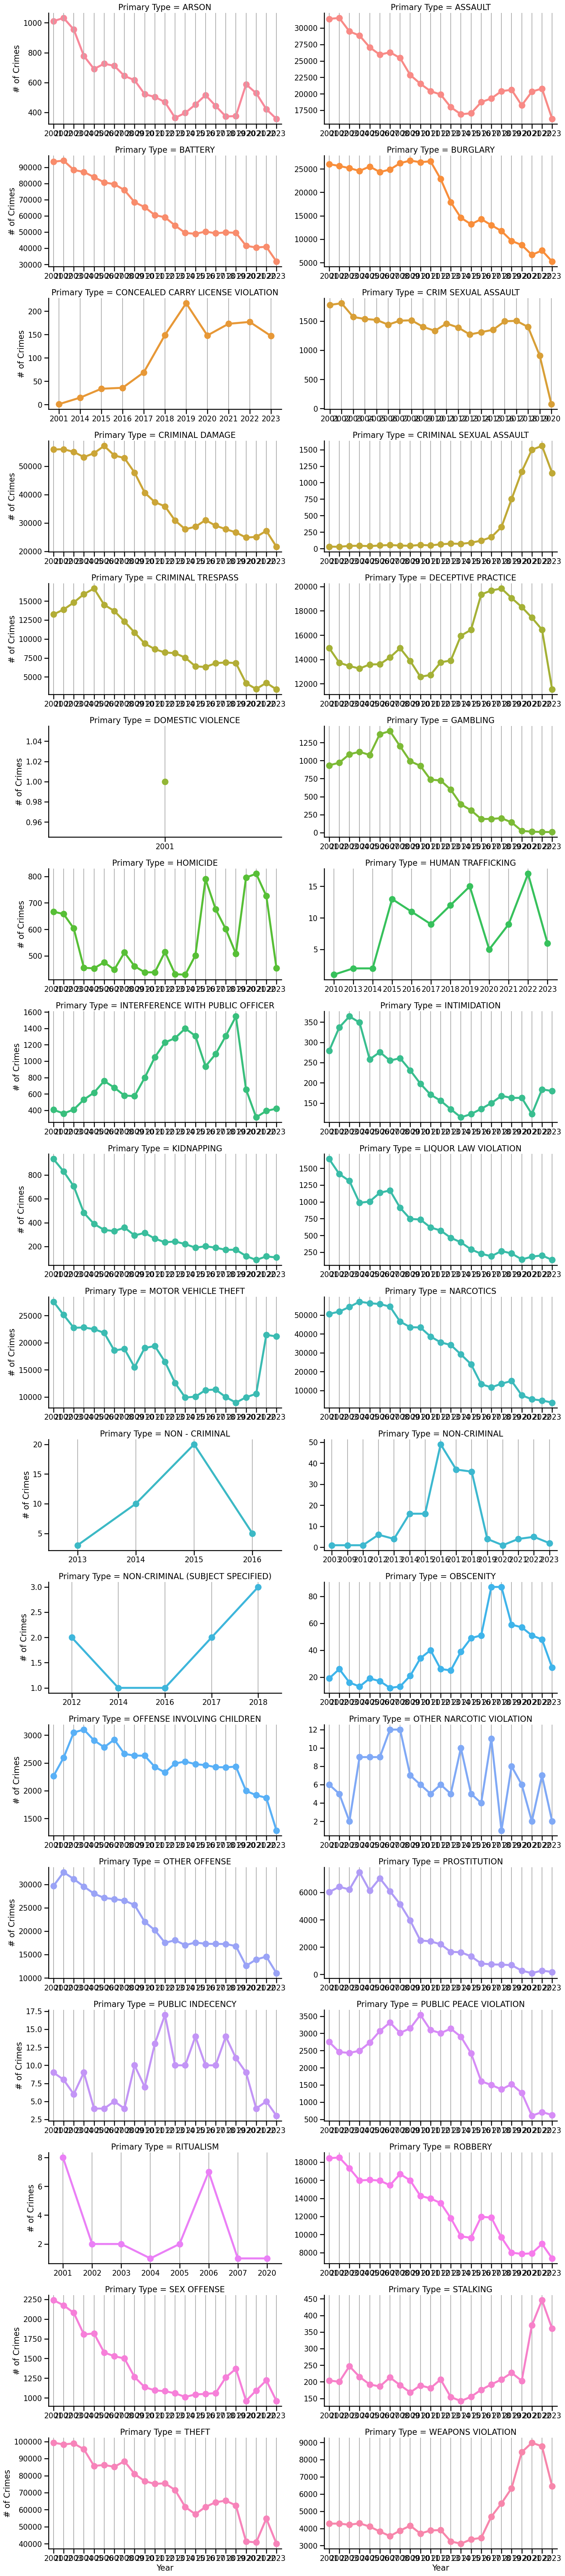

In [23]:
#Plot data
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

Is the total number of crimes increasing or decreasing across the years?
* The crimes seem to be trending down. There was a huge decline during the pandemic years. However, in 2022 the numbers tend to go back up. 

* In the years 2001 and 2002 there was a high number in crimes. 

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)? 

* Most of the crimes are trending downward except for motor vehicle theft.  

### Crime Across the Hours 

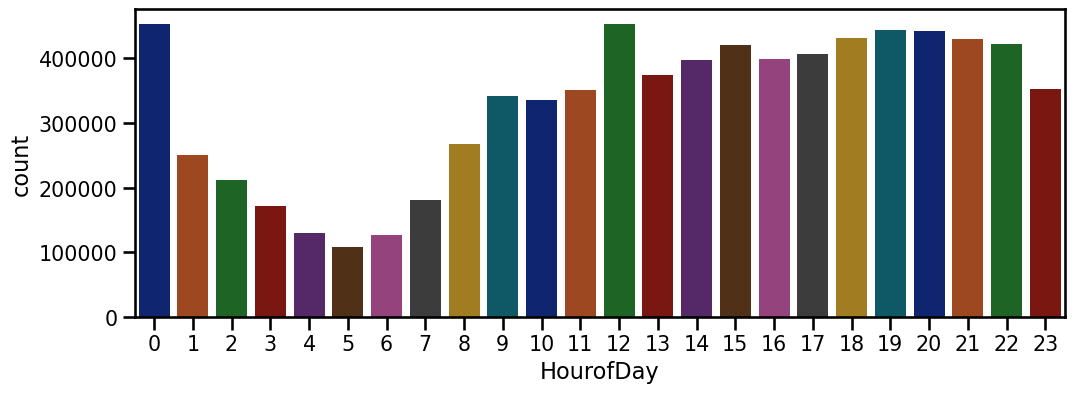

In [24]:
df_ts['HourofDay'] = df_ts.index.hour
sns.countplot(data=df_ts, x='HourofDay', palette='dark');

* As we can see above most of the crimes are happening in midnight and around noon. We will create a better graph to see which crimes are happening during these times. 
* Less crimes are happening between 1am and 7am (guess criminals need rest too, lol)

In [25]:
## Get # of crimes by Hour
crimes_by_hour = df_ts.groupby('Primary Type')['HourofDay'].value_counts().sort_index()
crimes_by_hour

Primary Type       HourofDay
ARSON              0            1097
                   1            1096
                   2            1085
                   3            1002
                   4             901
                                ... 
WEAPONS VIOLATION  19           7976
                   20           8719
                   21           9262
                   22           9103
                   23           8423
Name: HourofDay, Length: 800, dtype: int64

In [26]:
## convert to dataframe and reset_index()
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,HourofDay,# of Crimes
0,ARSON,0,1097
1,ARSON,1,1096
2,ARSON,2,1085
3,ARSON,3,1002
4,ARSON,4,901
...,...,...,...
795,WEAPONS VIOLATION,19,7976
796,WEAPONS VIOLATION,20,8719
797,WEAPONS VIOLATION,21,9262
798,WEAPONS VIOLATION,22,9103


C:\Users\nena_\anaconda3\envs\dojo-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


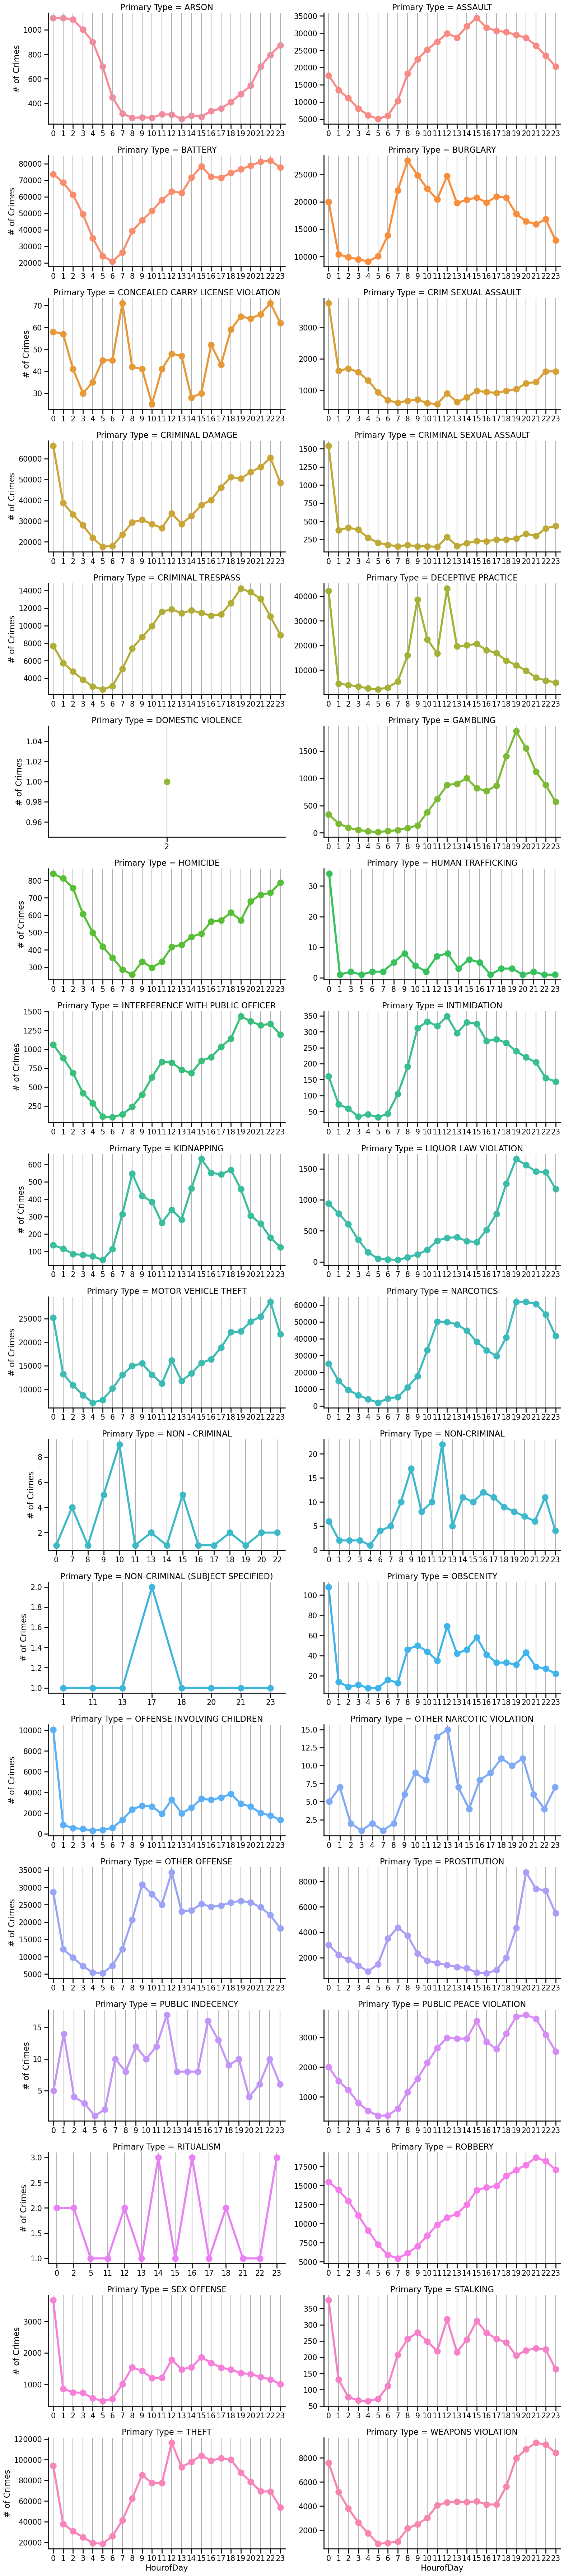

In [27]:
g = sns.catplot(data=plot_df, x='HourofDay', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];




The tops crimes are happening during midnight and noon: 
* Assault 
* Battery
* Criminal Trespass 
* Theft 
* Robbery 
* Public Peace Violation 

We can also see that:
* Homicides seem to have a spike at midnight
* Burglary seems to spike at 8am 
* Kidnapping seems to happening during the time kids are going to school and coming home. 
* Motor vehicle theft seems to happen around 10pm 